# laptop-price-predictor

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="laptop-price-predictor")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ivarchan/laptop-price-predictor" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ivarchan/laptop-price-predictor


'https://jovian.ai/ivarchan/laptop-price-predictor'

In [4]:
!pip install numpy pandas-profiling matplotlib plotly seaborn --quiet

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import os
import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
laptop_df = pd.read_csv('laptop_data.csv')

In [9]:
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [11]:
laptop_df.duplicated().sum()

0

In [12]:
laptop_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
laptop_df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
laptop_df['Ram'] = laptop_df['Ram'].str.replace('GB','')
laptop_df['Weight'] = laptop_df['Weight'].str.replace('kg','')

In [16]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
laptop_df['RAM'] = laptop_df['Ram'].astype('int32')
laptop_df['Weight'] = laptop_df['Weight'].astype('float32')

In [18]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

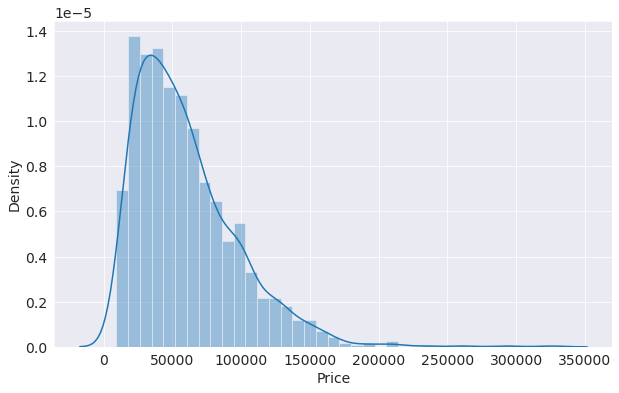

In [19]:
sns.distplot(laptop_df['Price'])

<AxesSubplot:>

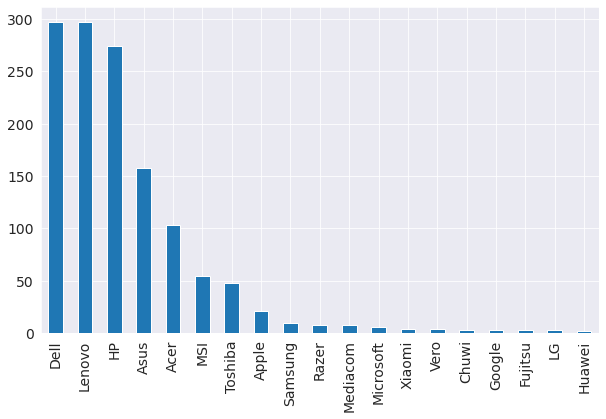

In [20]:
laptop_df['Company'].value_counts().plot(kind='bar')

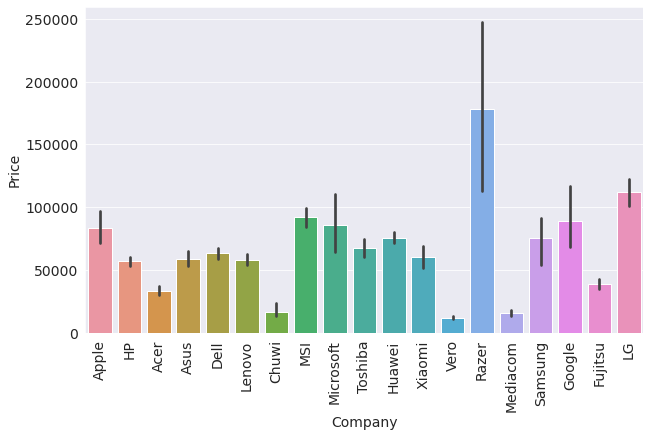

In [21]:
sns.barplot(x=laptop_df['Company'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

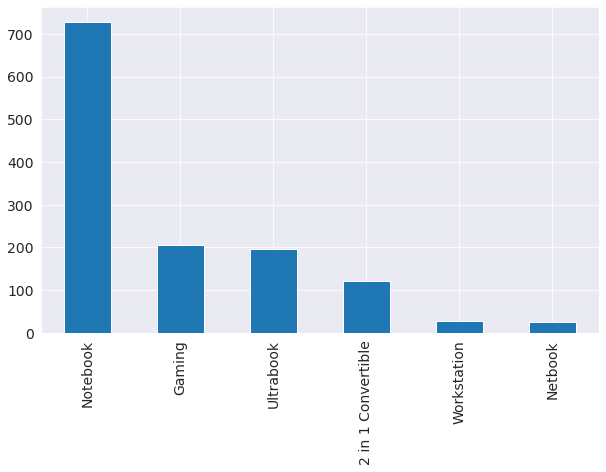

In [22]:
laptop_df['TypeName'].value_counts().plot(kind='bar')

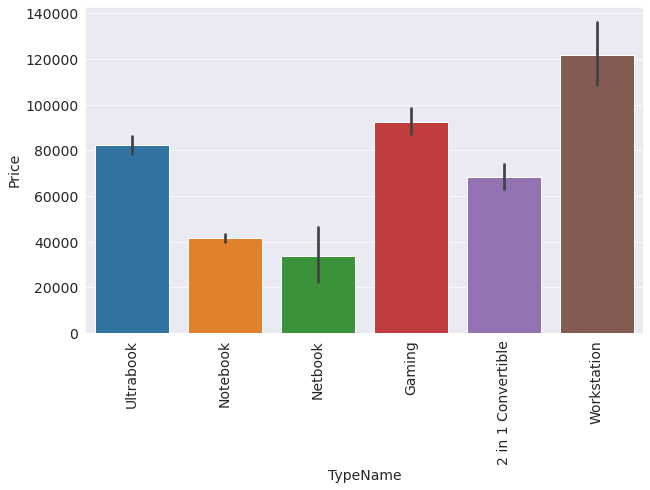

In [23]:
sns.barplot(x=laptop_df['TypeName'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

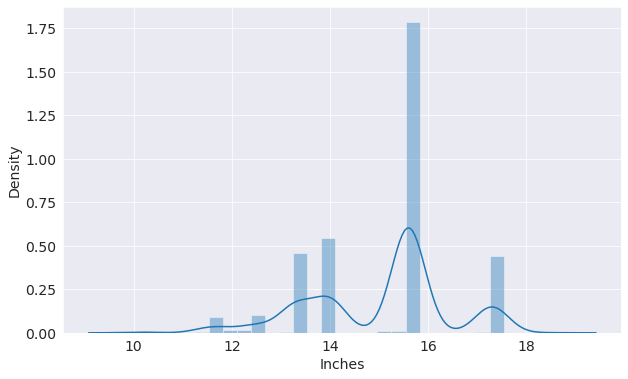

In [24]:
sns.distplot(laptop_df['Inches'])

In [25]:
laptop_df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
laptop_df['Touchscreen'] = laptop_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
laptop_df.sample(15)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen
459,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,34093.8720,8,0
592,Dell,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10,1.39,32127.8400,4,1
408,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,21791.5200,4,0
550,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,26586.7200,4,0
1136,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M3000M,Windows 7,3.00,210424.0320,8,0
282,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,44169.1200,8,0
232,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,79866.7200,16,0
1250,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,17262.7200,4,0
530,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,160520.3856,16,0
158,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.7200,8,1


<AxesSubplot:>

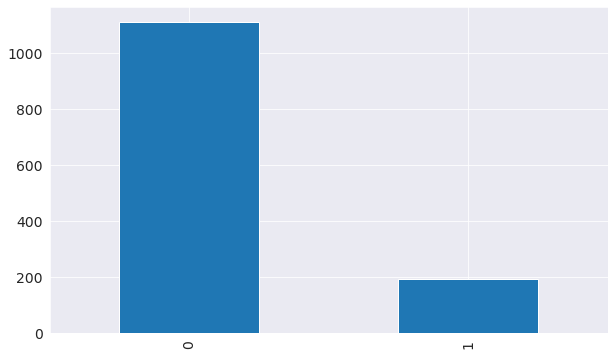

In [28]:
laptop_df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

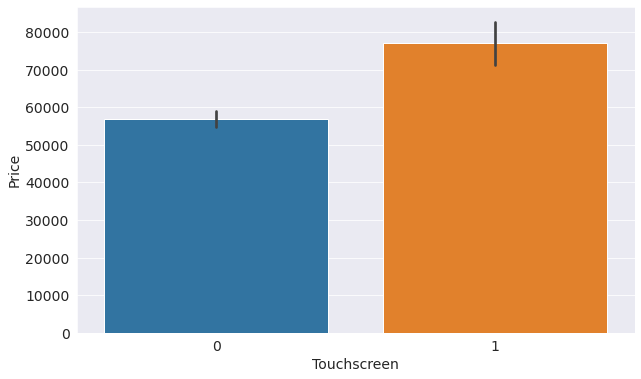

In [29]:
sns.barplot(x=laptop_df['Touchscreen'],y=laptop_df['Price'])

In [30]:
laptop_df['IPS'] = laptop_df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [31]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1


<AxesSubplot:>

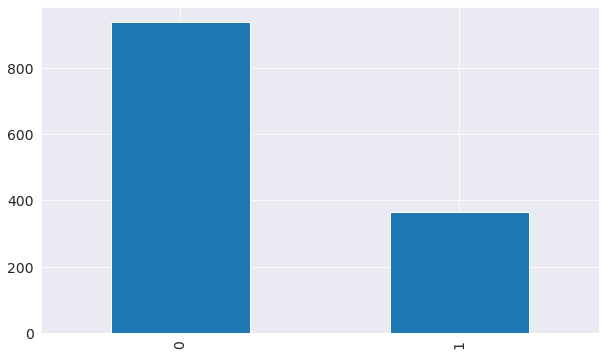

In [32]:
laptop_df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

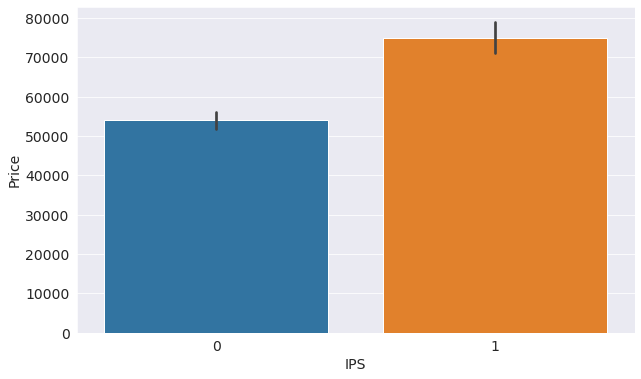

In [33]:
sns.barplot(x=laptop_df['IPS'],y=laptop_df['Price'])

In [34]:
sr = laptop_df['ScreenResolution'].str.split('x',n=1,expand=True)

In [35]:
laptop_df['X_res'] = sr[0]
laptop_df['Y_res'] = sr[1]

In [36]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,IPS Panel Retina Display 2560,1600


In [37]:
laptop_df['X_res'] = laptop_df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [38]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,2560,1600


In [39]:
laptop_df.corr()['Price'].sort_values(ascending=False)

Price          1.000000
RAM            0.743007
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [40]:
laptop_df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [41]:
laptop_df['CPU Name'] = laptop_df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,IPS,X_res,Y_res,CPU Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,8,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,8,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,8,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,16,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,8,0,1,2560,1600,Intel Core i5


In [43]:
laptop_df['CPU Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [44]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
laptop_df['Cpu Brand'] = laptop_df['CPU Name'].apply(fetch_processor)

In [46]:
laptop_df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,RAM,Touchscreen,IPS,X_res,Y_res,CPU Name,Cpu Brand
165,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.72,16,0,1,1920,1080,Intel Core i7,Intel Core i7
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,8,0,1,1920,1080,Intel Core i7,Intel Core i7
168,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.12,8,0,1,1920,1080,Intel Core i5,Intel Core i5
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.52,4,0,0,1366,768,Intel Pentium Quad,Other Intel Processor
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783.52,4,0,0,1920,1080,Intel Core i5,Intel Core i5
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,139593.60,16,0,1,2560,1440,Intel Core i7,Intel Core i7
939,Dell,Gaming,17.3,2560x1440,Intel Core i7 6820HK 2.7GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,146946.24,16,0,0,2560,1440,Intel Core i7,Intel Core i7
562,HP,Ultrabook,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y75 1.2GHz,16,512GB SSD,Intel HD Graphics 515,Windows 10,1.16,104695.20,16,1,1,3200,1800,Intel Core M,Other Intel Processor
609,Acer,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.60,18594.72,4,0,0,1366,768,Intel Pentium Quad,Other Intel Processor
597,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.70,78534.72,8,0,1,1920,1080,Intel Core i5,Intel Core i5


<AxesSubplot:>

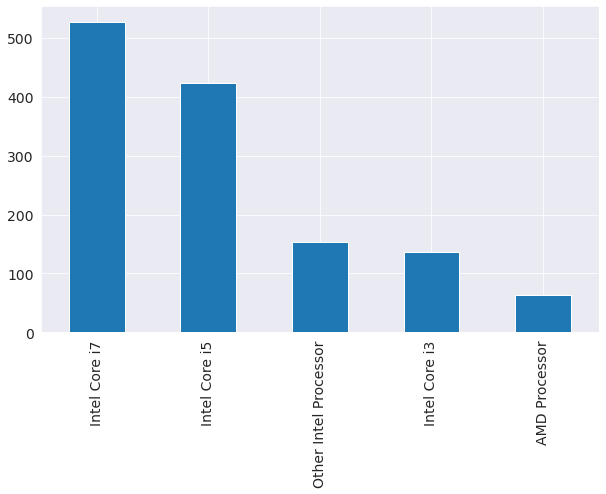

In [47]:
laptop_df['Cpu Brand'].value_counts().plot(kind='bar')

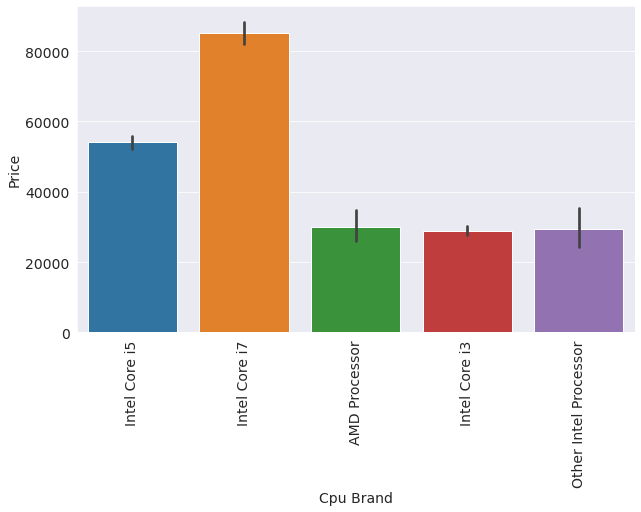

In [48]:
sns.barplot(x=laptop_df['Cpu Brand'],y=laptop_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
laptop_df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [50]:
laptop_df['Memory'] = laptop_df['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_df["Memory"] = laptop_df["Memory"].str.replace('GB', '')
laptop_df["Memory"] = laptop_df["Memory"].str.replace('TB', '000')
new = laptop_df["Memory"].str.split("+", n = 1, expand = True)

laptop_df["first"]= new[0]
laptop_df["first"]=laptop_df["first"].str.strip()

laptop_df["second"]= new[1]

laptop_df["Layer1HDD"] = laptop_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer1SSD"] = laptop_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer1Hybrid"] = laptop_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer1Flash_Storage"] = laptop_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['first'] = laptop_df['first'].str.replace(r'\D', '')

laptop_df["second"].fillna("0", inplace = True)

laptop_df["Layer2HDD"] = laptop_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer2SSD"] = laptop_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer2Hybrid"] = laptop_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer2Flash_Storage"] = laptop_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['second'] = laptop_df['second'].str.replace(r'\D', '')

laptop_df["first"] = laptop_df["first"].astype(int)
laptop_df["second"] = laptop_df["second"].astype(int)

laptop_df["HDD"]=(laptop_df["first"]*laptop_df["Layer1HDD"]+laptop_df["second"]*laptop_df["Layer2HDD"])
laptop_df["SSD"]=(laptop_df["first"]*laptop_df["Layer1SSD"]+laptop_df["second"]*laptop_df["Layer2SSD"])
laptop_df["Hybrid"]=(laptop_df["first"]*laptop_df["Layer1Hybrid"]+laptop_df["second"]*laptop_df["Layer2Hybrid"])
laptop_df["Flash_Storage"]=(laptop_df["first"]*laptop_df["Layer1Flash_Storage"]+laptop_df["second"]*laptop_df["Layer2Flash_Storage"])

laptop_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


/tmp/ipykernel_368/2050811134.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_df['first'] = laptop_df['first'].str.replace(r'\D', '')
/tmp/ipykernel_368/2050811134.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_df['second'] = laptop_df['second'].str.replace(r'\D', '')


In [51]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touchscreen,IPS,X_res,Y_res,CPU Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,2560,1600,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,1440,900,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,1920,1080,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,2880,1800,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,2560,1600,Intel Core i5,Intel Core i5,0,256,0,0


In [52]:
laptop_df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [53]:
laptop_df['GPU Brand'] = laptop_df['Gpu'].apply(lambda x:x.split()[0])

In [54]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,IPS,X_res,Y_res,CPU Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1,2560,1600,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1440,900,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,1920,1080,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,1,2880,1800,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1,2560,1600,Intel Core i5,Intel Core i5,0,256,0,0,Intel


In [55]:
laptop_df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

In [56]:
laptop_df = laptop_df[laptop_df['GPU Brand'] != 'ARM']

In [57]:
laptop_df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

In [58]:
laptop_df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [59]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [60]:
laptop_df['OS'] = laptop_df['OpSys'].apply(cat_os)

/tmp/ipykernel_368/1856628856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df['OS'] = laptop_df['OpSys'].apply(cat_os)


In [61]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,X_res,Y_res,CPU Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560,1600,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440,900,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,1920,1080,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,2880,1800,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560,1600,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


In [62]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   object 
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   float32
 10  Price             1302 non-null   float64
 11  RAM               1302 non-null   int32  
 12  Touchscreen       1302 non-null   int64  
 13  IPS               1302 non-null   int64  
 14  X_res             1302 non-null   object 
 15  Y_res             1302 non-null   object 
 16  CPU Name          1302 non-null   object 


In [63]:
laptop_df.shape

(1302, 24)

## Train/Test/Validation Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_val_df, test_df = train_test_split(laptop_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [66]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (780, 24)
val_df.shape : (261, 24)
test_df.shape : (261, 24)


## Input and Target columns

In [67]:
input_cols = ['Company','TypeName','RAM','Weight','Touchscreen','IPS','Cpu Brand','HDD','SSD','GPU Brand','OS']
target_col = 'Price'

In [68]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [69]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [70]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [71]:
test_inputs.head()

,Company,TypeName,RAM,Weight,Touchscreen,IPS,Cpu Brand,HDD,SSD,GPU Brand,OS
478,Dell,Notebook,8,2.2,0,0,Intel Core i5,1000,0,AMD,Windows
724,MSI,Gaming,8,2.7,0,0,Intel Core i7,1000,128,Nvidia,Windows
312,MSI,Gaming,16,2.8,0,1,Intel Core i7,1000,256,Nvidia,Windows
851,Asus,Gaming,16,2.1,0,0,Intel Core i7,1000,128,Nvidia,Windows
1276,Dell,Notebook,6,2.3,0,0,Intel Core i3,1000,0,Intel,Windows


## Numerical and Categorical columns

In [72]:
laptop_df['OS'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OS, dtype: int64

In [73]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [74]:
numeric_cols

['RAM', 'Weight', 'Touchscreen', 'IPS', 'HDD', 'SSD']

In [75]:
categorical_cols

['Company', 'TypeName', 'Cpu Brand', 'GPU Brand', 'OS']

## Imputation, Scaling and Encode

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [78]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [81]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [85]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [86]:
X_train

,RAM,Weight,Touchscreen,IPS,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,GPU Brand_AMD,GPU Brand_Intel,GPU Brand_Nvidia,OS_Mac,OS_Others/No OS/Linux,OS_Windows
84,0.066667,0.351621,0.0,0.0,0.50,0.000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
931,0.066667,0.142145,0.0,0.0,0.25,0.000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.066667,0.371571,0.0,0.0,0.50,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1067,0.200000,0.231920,1.0,0.0,0.00,0.250,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255,0.200000,0.179551,0.0,0.0,0.00,0.250,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.066667,0.177057,0.0,0.0,0.00,0.125,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
982,0.133333,0.376559,0.0,0.0,0.00,0.250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
173,0.066667,0.326683,0.0,0.0,0.25,0.000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
325,0.066667,0.187032,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Base values

In [87]:
def return_mean(inputs):
    return np.full(len(inputs), laptop_df.Price.mean())

In [88]:
train_preds = return_mean(X_train)

In [90]:
train_preds[0]

59889.058672810985

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error

In [92]:
mean_squared_error(train_preds, train_targets, squared=False)

38499.59913187927

In [93]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

32509.361387546684

## Base model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
linreg = LinearRegression()

In [96]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [97]:
train_preds = linreg.predict(X_train)
train_preds

array([  9072.,  48954.,  19696.,  67436.,  73290.,  28286.,  28294.,
        16718.,  64118., 112236.,  42210.,  80476.,  32498.,  77292.,
        68160.,  30678.,  23714.,  77124.,  33342.,  26188., 105772.,
        51702.,  87552.,  63034.,  58982.,  55482.,  48594.,  11908.,
        85856.,  52752.,  55910.,  53902.,  44250.,  19336.,  51572.,
        19770.,  52086.,  69432., 117872., 102540.,  44040.,  58350.,
        40222.,  27886.,  25850.,  48488., 135904.,  87028., 117468.,
        87096.,  41698.,  46828.,  43326.,  35622.,  51684.,  72632.,
        66542.,  49636.,  25520.,  93750.,  60934.,  18878., 104960.,
        95116., 101628.,   8160.,  10460.,  75382., 107944.,  35590.,
        99820.,  27264.,  32410.,  28108.,  57416.,  34942.,  40126.,
        67080.,  37930.,  46268.,  27044.,  54296., 100040.,  94216.,
        80808.,  52734.,  74620.,  63084.,  24552.,  54378.,  90540.,
       112588.,  59220.,  92328., 102540.,  56636.,  97472., 120884.,
        79884.,  120

In [98]:
mean_squared_error(train_preds, train_targets, squared=False)

17988.67792191407

In [99]:
val_preds = linreg.predict(X_val)
val_preds

array([ 88720.,  97472.,  50786.,  45892.,  31902.,  35862.,  57950.,
        74850.,  60902.,  93160.,  67802.,  31822.,  37888.,  44392.,
        76256.,  51606.,  15144.,  34970.,  48834.,  68160.,  43198.,
        11266., 177768.,  68160.,  23264.,  58738.,  60106.,  92872.,
        56762.,  56940.,   1242.,  95396.,  75970.,  71104.,  80296.,
        47950.,  71626.,  76040.,  79848.,  45696.,  64960.,  34112.,
        18602.,  65680.,  71652.,  65636., 105272.,  57350.,  93256.,
        20964.,  35888.,  72950.,  26754.,  51126.,  76766.,   8030.,
        26642.,  40800.,  58416., 115428.,  29942.,  72414.,  57706.,
        28988., 100004.,  81160.,  62144.,  57772.,   6004., 109560.,
        64058., 103528.,  33658.,  92896.,  27750., 100848.,  71214.,
        66168.,  52586.,  28770.,  17714.,  39652.,  74468., 108648.,
        28830.,  74110.,  88492.,  40462.,  27802.,  44034.,  62562.,
        52070.,  66496.,  15556.,  87552.,  55982.,  74632.,  16942.,
        41628.,  390

In [100]:
mean_squared_error(val_preds, val_targets, squared=False)

17522.78909329805

In [123]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    
    print('--------- Traning--------')
    print('RMSE',train_rmse)
    print('R2/Model score',r2_score(train_targets,train_preds))
    print('MAE',mean_absolute_error(train_targets,train_preds))
    
    print('--------- Validation------')
    print('RMSE',val_rmse)
    print('R2/Model score',r2_score(val_targets,val_preds))
    print('MAE',mean_absolute_error(val_targets,val_preds))

In [102]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [103]:
try_model(LinearRegression())

--------- Traning--------
RMSE 17988.67792191407
R2 score 0.7816315587789521
MAE 12696.383327179488
--------- Validation------
RMSE 17522.78909329805
R2 score 0.7094124229543046
MAE 12582.0262743295


In [104]:
try_model(Ridge())

--------- Traning--------
RMSE 18042.28449697088
R2 score 0.7803281360033377
MAE 12706.71600563969
--------- Validation------
RMSE 17264.3905461631
R2 score 0.7179194901572064
MAE 12435.29162323264


In [105]:
try_model(Lasso())

--------- Traning--------
RMSE 17988.844936308968
R2 score 0.7816275039126035
MAE 12695.452259419668
--------- Validation------
RMSE 17515.34178652863
R2 score 0.7096593739323112
MAE 12575.014767472889


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e+10, tolerance: 1.156e+08
  model = cd_fast.enet_coordinate_descent(


In [106]:
try_model(ElasticNet())

--------- Traning--------
RMSE 28655.045210845965
R2 score 0.4458930748796228
MAE 21099.213150943935
--------- Validation------
RMSE 23537.15881257386
R2 score 0.47570145609122927
MAE 18454.739330585966


In [107]:
try_model(SGDRegressor())

--------- Traning--------
RMSE 18251.265671766345
R2 score 0.7752098093373654
MAE 12868.964076754437
--------- Validation------
RMSE 17210.533313464573
R2 score 0.7196766769345282
MAE 12439.067223962687


In [108]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [109]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

--------- Traning--------
RMSE 3142.5882465580717
R2 score 0.9933355188230596
MAE 880.8099323076922
--------- Validation------
RMSE 20773.48632800404
R2 score 0.5915965960011039
MAE 12988.92604137931


In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1) 

In [124]:
%%time
rf = RandomForestRegressor(n_estimators=100,
                           random_state=12,
                           max_samples=0.5,
                           max_features=0.75,
                           max_depth=15)

try_model(rf)

--------- Traning--------
RMSE 11207.130836961345
R2/Model score 0.9152420847333896
MAE 7063.457167331098
--------- Validation------
RMSE 14767.205714060372
R2/Model score 0.7936201816151572
MAE 10262.365854898033
CPU times: user 200 ms, sys: 1.5 ms, total: 201 ms
Wall time: 198 ms


In [125]:
rf.feature_importances_

array([4.82296195e-01, 1.36062914e-01, 9.32057726e-03, 1.20358112e-02,
       9.10710599e-03, 8.65562076e-02, 2.47271262e-03, 1.41010804e-03,
       6.56921383e-03, 1.55805870e-05, 6.81311163e-03, 3.89920437e-05,
       6.05366918e-05, 9.77077439e-03, 1.24247896e-04, 9.95815224e-05,
       8.65898024e-03, 2.16560653e-03, 2.18842104e-05, 6.28923911e-04,
       1.39161257e-02, 3.92750479e-04, 1.94224323e-03, 3.23272763e-05,
       5.88738557e-05, 2.71039839e-03, 5.34495678e-03, 1.54165825e-03,
       6.14191563e-02, 7.53319515e-03, 2.17698561e-02, 8.40496352e-04,
       2.66183789e-03, 1.65863170e-02, 5.09209284e-02, 1.46740682e-02,
       3.82782920e-03, 5.13341347e-03, 6.13294101e-03, 7.59450370e-04,
       3.92366483e-03, 3.64844612e-03])

In [126]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,RAM,0.482296
1,Weight,0.136063
5,SSD,0.086556
28,TypeName_Notebook,0.061419
34,Cpu Brand_Intel Core i7,0.050921
30,TypeName_Workstation,0.021770
33,Cpu Brand_Intel Core i5,0.016586
35,Cpu Brand_Other Intel Processor,0.014674
20,Company_Razer,0.013916
3,IPS,0.012036


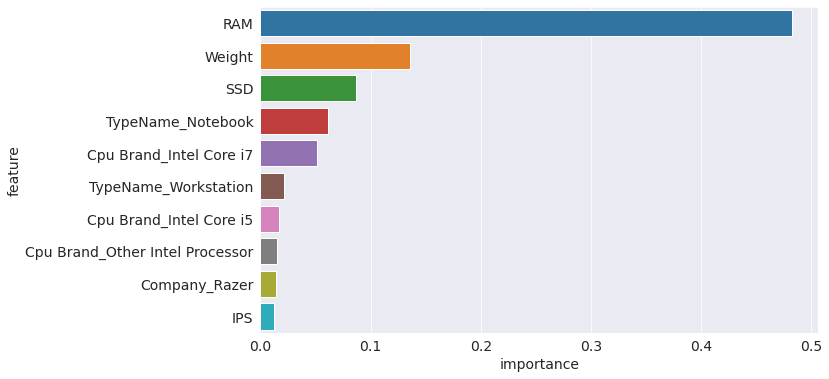

In [127]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))